In [1]:
!mkdir -p /root/.kaggle

In [2]:
!cp kaggle.json /root/.kaggle

In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:10<00:00, 227MB/s]
100% 1.06G/1.06G [00:10<00:00, 113MB/s]


In [5]:
pwd

'/content'

In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [8]:
# Internally it is using generator concept in python

train_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/dogs_vs_cats/train',
    batch_size =32,
    image_size = (256,256),
    labels ='inferred',
    label_mode ='int'
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory ='/content/dogs_vs_cats/test',
    batch_size =32,
    image_size = (256,256),
    labels ='inferred',
    label_mode='int'
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#Normalization

def process(image,label):
  image = tf.cast(image/255., tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
model = Sequential()

In [11]:
# This is my first convulation layer
model.add(Conv2D(32,kernel_size=(3,3),padding ='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Second convulation layer
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides =2,padding='valid'))

#Third convulation layer
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation ='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2,padding='valid'))

#Convert the data into 1d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and relu activation
model.add(Dense(128,activation ='relu'))

#adding second hidden layer with 64 neurons and relu activation
model.add(Dense(64,activation='relu'))

#here we have 1 output since it is a binary classification
model.add(Dense(1,activation ='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics =['accuracy'])

In [14]:
model.fit(train_ds,epochs=2,validation_data  = validation_ds)

Epoch 1/2
625/625 [==============================] - 71s 91ms/step - loss: 0.6592 - accuracy: 0.6040 - val_loss: 0.6157 - val_accuracy: 0.6484
Epoch 2/2
625/625 [==============================] - 53s 84ms/step - loss: 0.5361 - accuracy: 0.7293 - val_loss: 0.4974 - val_accuracy: 0.7514


In [15]:
import matplotlib.pyplot as plt

In [17]:
dog_image = plt.imread('/content/catdog.jpeg')

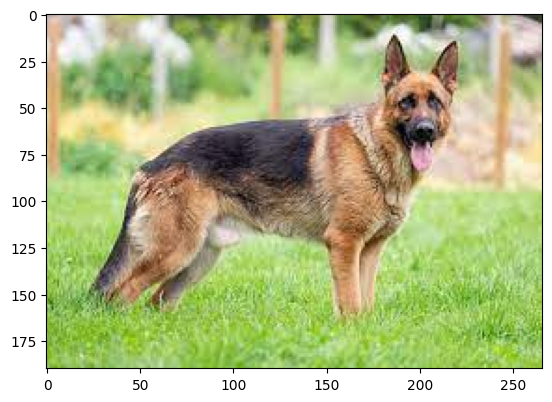

In [18]:
plt.imshow(dog_image)

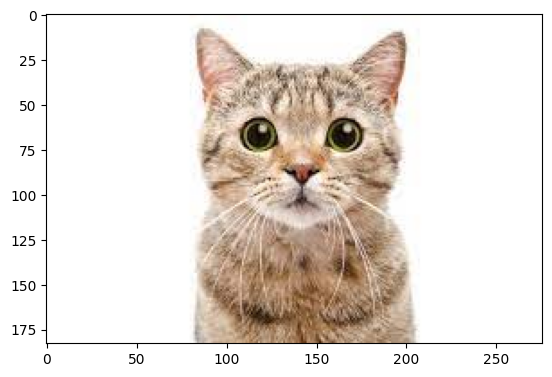

In [19]:
cat_image = plt.imread('/content/cat2.jpeg')


plt.imshow(cat_image)

In [20]:
dog_image.shape

(190, 266, 3)

In [21]:
cat_image.shape

(183, 276, 3)

In [22]:
import cv2
dog_resize = cv2.resize(dog_image,(256,256))
cat_resize = cv2.resize(cat_image,(256,256))

In [23]:
dog_resize.shape

(256, 256, 3)

In [24]:
cat_resize.shape

(256, 256, 3)

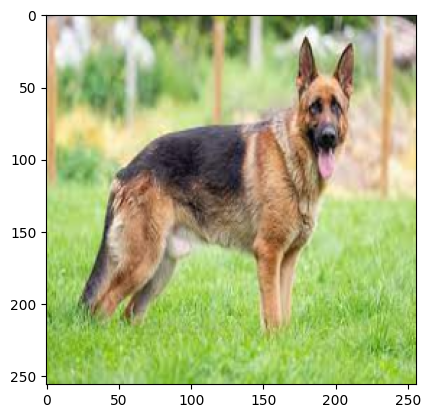

In [25]:
plt.imshow(dog_resize)

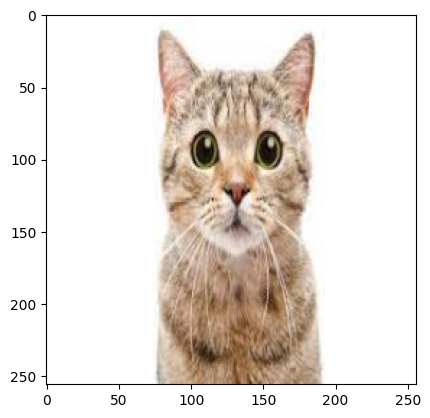

In [26]:
plt.imshow(cat_resize)

In [27]:
dog_resize = dog_resize.reshape((1,256,256,3))

In [28]:
dog_resize.shape

(1, 256, 256, 3)

In [29]:
cat_resize = cat_resize.reshape((1,256,256,3))

In [30]:
cat_resize.shape

(1, 256, 256, 3)

In [31]:
pred = model.predict(dog_resize)

1/1 [==============================] - 0s 239ms/step


In [32]:
pred

array([[1.]], dtype=float32)

In [33]:
pred2 = model.predict(cat_resize)
pred2

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)